# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 observations in our dataset.  We know this because we can see here the count of 400 rows for admitted.  We also see that GRE and GPA columns have two missing values, while Prestige has one missing value.

#### Question 2. Create a summary table

In [6]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The standard deviation provides some idea about the distribution of scores around the mean (average).  It is used to quantify the amount of variation (or dispersion) in the dataset.  A low standard deviation indicates that the data points tend to be close to the mean, while a high standard deviation indicates that the data points tend to be spread out over a wider range.  Therefore, GRE would have a larger STD if the data is spread out over a wider range than GPA.  This makes sense based on our exploration in the previous project where we saw that the range is (200-800) for GRE and (0.00-4.00) for GPA. 

#### Question 4. Drop data points with missing data


In [14]:
df = df_raw.dropna()
df.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [1]:
df.isnull()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [47]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [23]:
print df.gre.mean()
print df_raw.gre.mean()
print df.gpa.mean()
print df_raw.gpa.mean()
print df.prestige.mean()
print df_raw.prestige.mean()

587.858942065
588.040201005
3.3922418136
3.39092964824
2.48866498741
2.48621553885


Answer: We can confirm that we dropped the correct data by generating the summary statistics and comparing to the original dataset.  Here we see that dropping the null values has little effect on the mean and standard deviation for each column as compared to the previous table.  This is good, this tells us that we dropped the correct data.

#### Question 6. Create box plots for GRE and GPA

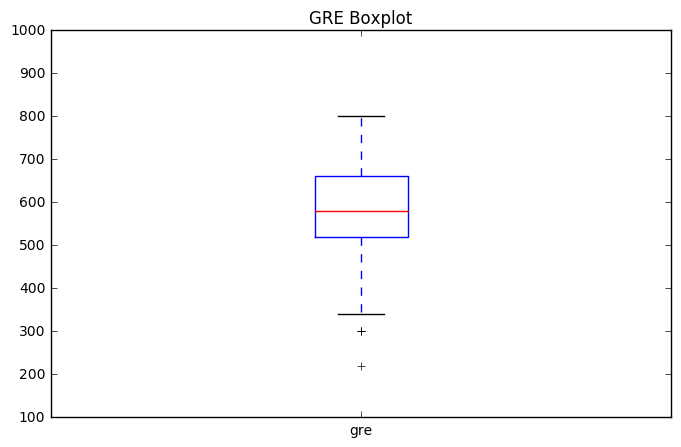

In [49]:
#boxplot 1
fig, ax1 = plt.subplots(1, figsize = (8,5))
ax1.set_ylim([100, 1000])
df.gre.plot.box(title = 'GRE Boxplot')

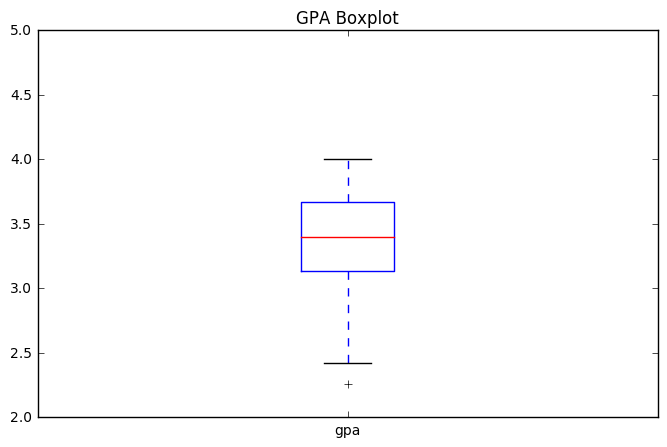

In [48]:
#boxplot 2
fig, ax2 = plt.subplots(1, figsize = (8,5))
ax2.set_ylim([2, 5])
df.gpa.plot.box(title = 'GPA Boxplot')

#### Question 7. What do this plots show?

Answer: Boxplots help us to understand the distribution of the data and test for outliers based on five summary statistics: minimim, maximum, first quartile, third quartile, and median.  They provide a useful way for us to visualize the range and other characteristics of responses for a large group.  The GRE Boxplot shows us that the GRE mean (588) is greater than the median (580), indicating a slight skewness.  We can also see that there are two outliers for GRE (300 and 200) that fall below the first quartile.  The GPA Boxplot shows us that there is a slightly higher variation for GPA even though the median (3.4) is about the same as the mean (3.39).  We can also see that there is one outlier for GPA (2.25) that falls below the first quartile. 

#### Question 8. Describe each distribution 

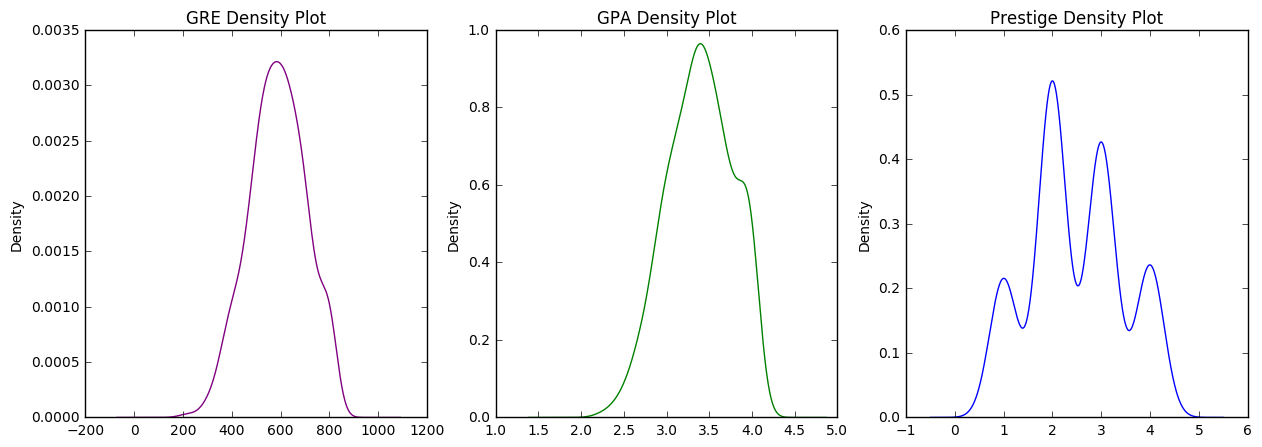

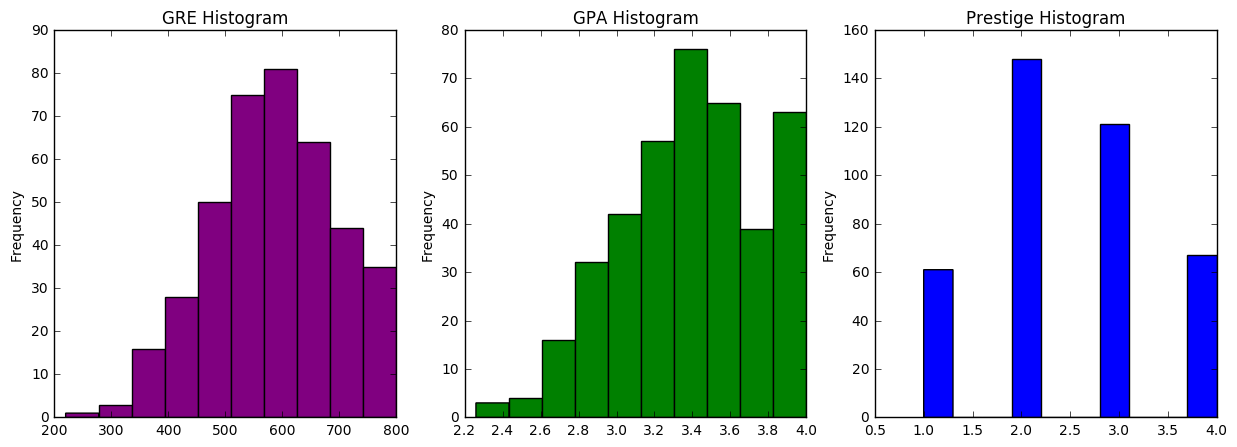

In [116]:
# plot the distribution of each variable - density plots
fig, axs = plt.subplots(1, 3, figsize = (15,5))
df.gre.plot(kind="density", 
            ax=axs[0], 
            color = 'purple', 
            title = 'GRE Density Plot')
df.gpa.plot(kind="density", 
            ax=axs[1], 
            color = 'green', 
            title = 'GPA Density Plot')
df.prestige.plot(kind="density", 
            ax=axs[2], 
            color = 'blue', 
            title = 'Prestige Density Plot')

# plot the distribution of each variable - histograms
fig2, axs = plt.subplots(1, 3, figsize = (15,5))
df.gre.plot(kind="hist", 
            ax=axs[0], 
            color = 'purple', 
            title = 'GRE Histogram')
df.gpa.plot(kind="hist", 
            ax=axs[1], 
            color = 'green', 
            title = 'GPA Histogram')
df.prestige.plot(kind="hist", 
            ax=axs[2], 
            color = 'blue', 
            title = 'Prestige Histogram')


-0.146046988216
-0.332864354651
-0.216888932969
-0.563569899522
0.0865055528971
-0.90103795489


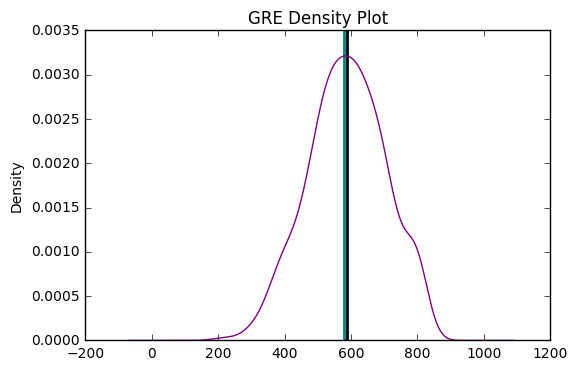

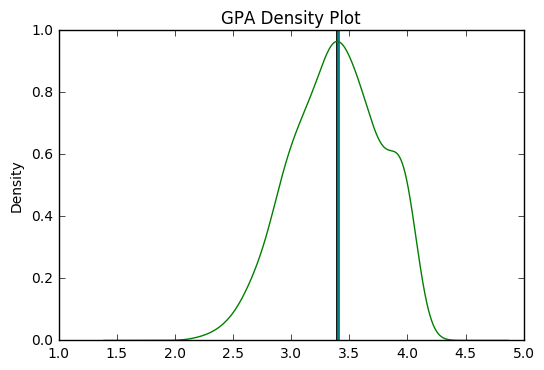

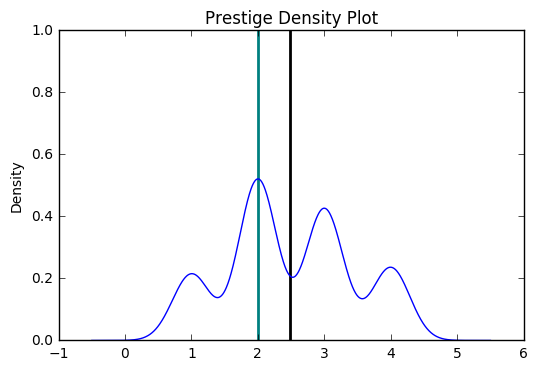

In [124]:
plt.figure()
df.gre.plot(kind = "density",
            color = 'purple', 
            title = 'GRE Density Plot')
plt.vlines(df.gre.mean(),
          ymin = 0,
          ymax = .0035,
          linewidth = 2.0,
          color = 'black')
plt.vlines(df.gre.median(),
          ymin = 0,
          ymax = .0035,
          linewidth = 2.0,
          color = 'teal')


plt.figure()
df.gpa.plot(kind = "density",
            color = 'green', 
            title = 'GPA Density Plot')
plt.vlines(df.gpa.mean(),
          ymin = 0,
          ymax = 1,
          linewidth = 2.0,
          color = 'black')
plt.vlines(df.gpa.median(),
          ymin = 0,
          ymax = 1,
          linewidth = 2.0,
          color = 'teal')


plt.figure()
df.prestige.plot(kind = "density",
            color = 'blue', 
            title = 'Prestige Density Plot')
plt.vlines(df.prestige.mean(),
          ymin = 0,
          ymax = 1,
          linewidth = 2.0,
          color = 'black')
plt.vlines(df.prestige.median(),
          ymin = 0,
          ymax = 1,
          linewidth = 2.0,
          color = 'teal')



print df.gre.skew()
print df.gpa.skew()
print df.prestige.skew()

print df.gre.kurt()
print df.gpa.kurt()
print df.prestige.kurt()


#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes.  Our exploration above showed us that our data was close enough to a normal distribution since the the skewness values are between (-0.5 and 0.5) and the kurtosis values are between (-2 and 2) for each variable.  Therefore, we can use a model that assumes normality.  

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Our variables are close enough to a normal distribution so we do not need correction.  If the data were not normalized, then it would need to be corrected or we would need to use a different model.  The reason being that most inferential statistics rely on the assumption of normality so if this assumption is incorrect and the data is not normal, our methods will produce inaccurate estimates.  Normally distributed data is needed to use a number of statistical tools and methods (e.g. regression, ANOVA, etc.), but not all.  There could be a number of reasons the data is not normally distributed so the method for correcting the data would depend on what the reason is.  

Example 1: Too many extreme values in a data set will cause a skew. This can be corrected by cleaning the data... determining measurement errors, data-entry errors and outliers, and removing them from the data for valid reasons.  Outliers should be identified as truly special causes before they are eliminated.

Example 2: Too many values close to zero or a natural limit will cause a skew.  This can be corrected with a Box-Cox power transformation, which identifies an appropriate exponent (Lambda = l) to use to transform data into normality.

#### Question 11. Which of our variables are potentially colinear? 

In [123]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer:  The correlation coefficient for GPA and GRE indicates that the two variables have a very slight positive correlation.  This suggests that students with a high GPA are likely to also score high on the GRE.  Since R is so low (0.382) we can say that the correlation is weak.  It is also interesting to note that the correlation coefficient for GPA and Prestige, and GRE and Prestige is negative.  This seems unusual because one might expect that a student who attends a school of high prestige would have a high GPA and high GRE score.... but the R values are so small and close to zero that suggest this correlation is insignificant.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

1. Clean the dataset (i.e. rid of null values and rename any columns).
2. Generate a table of summary statistics for the dataset and the results about your variables.
3. Create your data dictionary.  From here you will see that Prestige is an ordinal categorical variable.
4. If Prestige were a continuous variable (it's not):
    4.1. Generate a boxplot for the Prestige to understand the distribution of your data (min, max, median, first quartile, fourth quartile) and test for outliers.
    4.2. Generate a histogram and density plot for the Prestige to understand the distribution.  What is the skewness?  the kurtosis?
    4.3. If the data is not normally distributed, understand why and determine the best method for correcting it (if needed).
5. Since categorical predictor variables cannot be entered directly into a regression model and be meaningfully interpreted, transform Prestige using pandas dummy variables:
    5.1.  Since Prestige has 4 levels, we will construct 3 dichotomous variables that can be entered in to a regression model (i.e. dummy coding)
    5.2.  Depending on how the dichotomous variables are constructed, additional information can be gleaned from our analysis and result in uncorrelated dichotomous variables.
6. Generate a correlation matrix to test for colinearity between pairs of predictors.  We can also test by plotting the variables (e.g. scatterplots).
7. If there is indication of high correlation with any of the variables (there is not in this dataset), one of the highly correlated variables should be removed because they supply redundant information.  
8. Use the R-squared values for each variable to determine which of the colinear variables to keep.  Keep the variable that has an R-squared closer to 1.
9. Assuming normal distribution, generate your models using the OLS method for linear regression with your Prestige dummy variables.
10.  Use OLS Regression Results to assess the association between the outcome and the variables of your model, and then determine which model is of best fit.
11.  Use the R-squared and R_adj-squared values to help determine the best fit model.
12.  Use the t-statistic, p-values, and confidence intervals for each model to determine the significance of each variable.  If the the p-value is greater than 0.05 and/or zero falls within the confidence interval, then we can say the variable (e.g. Prestige) is not significant.

#### Question 14. What is your hypothesis? 

Answer: If a student performs well on their GRE, has a high GPA, and attends a highly ranked school then he/she is more likely to be admitted to UCLA grad school than a student who does not perform well on their GRE, has a low GPA, and attends a lower ranked school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data